In [9]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.utils import to_categorical
from sklearn.metrics import balanced_accuracy_score
import cv2
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import random
import matplotlib.pyplot as plt

In [2]:
xt = np.load("Dados/Xtrain_Classification1.npy") 
yt = np.load("Dados/ytrain_Classification1.npy")
xScaled =  (xt).astype('float32')/255.0

In [3]:
X_train, X_test, y_train, y_test = train_test_split(xScaled, yt, test_size=0.2, shuffle=True, random_state=10, stratify=yt)

In [4]:
X_testrs = X_test.reshape(-1, 28,28,3)
X_trainrs = X_train.reshape(-1, 28,28,3)
addx = np.array([])
addy = np.array([]) 
for idx, i in enumerate(y_train):
        a = random.uniform(0,1)
        if i == 1 and a > 0.85:
            for l in range(3):
                if l == 0:
                    if not np.any(addx):
                        addx = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_COUNTERCLOCKWISE), axis=0)
                        addy = np.append(addy,i)
                    else:
                        aux = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_COUNTERCLOCKWISE), axis=0)
                        addx = np.append(addx,aux,axis=0)
                        addy = np.append(addy,i)
                    
                elif l == 1:
                    aux = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_CLOCKWISE), axis=0) 
                    addx = np.append(addx,aux,axis=0)
                    addy = np.append(addy,i)
                
                elif l == 2:
                    aux = np.expand_dims(cv2.rotate(X_trainrs[idx],  cv2.ROTATE_180), axis=0) 
                    addx = np.append(addx,aux,axis=0)
                    addy = np.append(addy,i)

X_trainrs = np.append(X_trainrs,addx,axis=0) 
y_train = np.append(y_train,addy)

count = np.zeros(2)
for i in y_train.astype('int'):
    count[i]+=1
count

array([4286., 1056.])

In [5]:
X_trainrs = X_trainrs.reshape(-1, 28*28*3)  
rus = RandomUnderSampler(sampling_strategy={0: 1056, 1:1056})
X_trainrs, y_train = rus.fit_resample(X_trainrs, y_train)
X_trainrs = X_trainrs.reshape(-1, 28,28,3)
y_trainto = to_categorical(y_train,2)
y_testto = to_categorical(y_test,2)

In [6]:
# svm = SVC()
# param_grid = {
#     'C': [0.1, 1, 10, 100],  
#     'kernel': ['poly', 'rbf'], 
#     'gamma': [0.001, 0.01, 0.1, 1] 
# }


# grid_search = GridSearchCV(svm, param_grid, cv=5,  n_jobs=-1, scoring='balanced_accuracy')
# grid_search.fit(X_trainrs.reshape(-1,28*28*3), y_train)
# grid_search.best_params_, grid_search.best_score_

# Create an SVM classifier (SVC in this case)
clf = SVC(kernel='rbf', C=10, gamma=0.01)  # You can choose different kernels and adjust parameters
# Train the classifier on the training data
clf.fit(X_trainrs.reshape(-1,28*28*3), y_train)



SVC(C=10, gamma=0.01)

In [7]:
# grid_search.best_params_, grid_search.best_score_

Balanced ACC SVC-> 0.7744517635287251


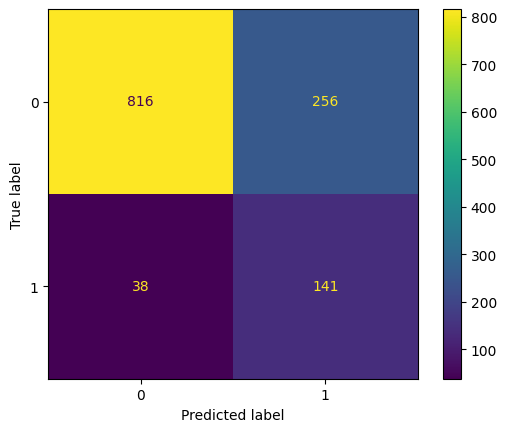

In [10]:
# Make predictions on the test data
y_pred = clf.predict(X_testrs.reshape(-1,28*28*3))

# Calculate and print the accuracy of the classifier
print("Balanced ACC SVC->", balanced_accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()